## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 53.4ms	remaining: 53.3s
1:	learn: 0.9301086	total: 56.8ms	remaining: 28.4s
2:	learn: 0.9005637	total: 60.2ms	remaining: 20s
3:	learn: 0.8720983	total: 65.3ms	remaining: 16.3s
4:	learn: 0.8467410	total: 68.5ms	remaining: 13.6s
5:	learn: 0.8226672	total: 71.6ms	remaining: 11.9s
6:	learn: 0.7994702	total: 74.7ms	remaining: 10.6s
7:	learn: 0.7784272	total: 77.8ms	remaining: 9.64s
8:	learn: 0.7602192	total: 80.5ms	remaining: 8.87s
9:	learn: 0.7412421	total: 83.4ms	remaining: 8.26s
10:	learn: 0.7247930	total: 86.2ms	remaining: 7.75s
11:	learn: 0.7089951	total: 89.3ms	remaining: 7.35s
12:	learn: 0.6951345	total: 92.3ms	remaining: 7.01s
13:	learn: 0.6809276	total: 95.2ms	remaining: 6.7s
14:	learn: 0.6692630	total: 97.8ms	remaining: 6.42s
15:	learn: 0.6588323	total: 101ms	remaining: 6.21s
16:	learn: 0.6472700	total: 104ms	remaining: 6s
17:	learn: 0.6379982	total: 107ms	remaining: 5.82s
18:	learn: 0.6294674	total: 110ms	remaining: 5.66s
19

44:	learn: 0.5100547	total: 186ms	remaining: 3.95s
45:	learn: 0.5069096	total: 189ms	remaining: 3.92s
46:	learn: 0.5051685	total: 192ms	remaining: 3.89s
47:	learn: 0.5033968	total: 195ms	remaining: 3.86s
48:	learn: 0.5012433	total: 197ms	remaining: 3.83s
49:	learn: 0.4986132	total: 200ms	remaining: 3.81s
50:	learn: 0.4968022	total: 203ms	remaining: 3.78s
51:	learn: 0.4951632	total: 206ms	remaining: 3.75s
52:	learn: 0.4928924	total: 209ms	remaining: 3.73s
53:	learn: 0.4917272	total: 212ms	remaining: 3.71s
54:	learn: 0.4895079	total: 216ms	remaining: 3.71s
55:	learn: 0.4881884	total: 219ms	remaining: 3.69s
56:	learn: 0.4861566	total: 222ms	remaining: 3.67s
57:	learn: 0.4850201	total: 224ms	remaining: 3.64s
58:	learn: 0.4840055	total: 227ms	remaining: 3.62s
59:	learn: 0.4824455	total: 230ms	remaining: 3.6s
60:	learn: 0.4809744	total: 233ms	remaining: 3.58s
61:	learn: 0.4801376	total: 236ms	remaining: 3.57s
62:	learn: 0.4792422	total: 239ms	remaining: 3.55s
63:	learn: 0.4780719	total: 244m

106:	learn: 0.4451085	total: 370ms	remaining: 3.09s
107:	learn: 0.4447909	total: 373ms	remaining: 3.08s
108:	learn: 0.4440936	total: 377ms	remaining: 3.08s
109:	learn: 0.4435519	total: 379ms	remaining: 3.07s
110:	learn: 0.4431075	total: 382ms	remaining: 3.06s
111:	learn: 0.4425498	total: 386ms	remaining: 3.06s
112:	learn: 0.4419106	total: 389ms	remaining: 3.06s
113:	learn: 0.4414425	total: 392ms	remaining: 3.05s
114:	learn: 0.4407446	total: 395ms	remaining: 3.04s
115:	learn: 0.4402011	total: 398ms	remaining: 3.03s
116:	learn: 0.4398559	total: 401ms	remaining: 3.02s
117:	learn: 0.4392990	total: 404ms	remaining: 3.02s
118:	learn: 0.4389153	total: 406ms	remaining: 3.01s
119:	learn: 0.4383331	total: 409ms	remaining: 3s
120:	learn: 0.4378136	total: 413ms	remaining: 3s
121:	learn: 0.4375553	total: 415ms	remaining: 2.99s
122:	learn: 0.4369995	total: 418ms	remaining: 2.98s
123:	learn: 0.4366325	total: 421ms	remaining: 2.97s
124:	learn: 0.4362823	total: 423ms	remaining: 2.96s
125:	learn: 0.4359

171:	learn: 0.4156228	total: 562ms	remaining: 2.71s
172:	learn: 0.4153041	total: 565ms	remaining: 2.7s
173:	learn: 0.4148857	total: 568ms	remaining: 2.7s
174:	learn: 0.4144190	total: 571ms	remaining: 2.69s
175:	learn: 0.4140875	total: 573ms	remaining: 2.69s
176:	learn: 0.4136755	total: 576ms	remaining: 2.68s
177:	learn: 0.4133860	total: 579ms	remaining: 2.67s
178:	learn: 0.4129780	total: 581ms	remaining: 2.67s
179:	learn: 0.4122907	total: 584ms	remaining: 2.66s
180:	learn: 0.4119188	total: 587ms	remaining: 2.65s
181:	learn: 0.4115412	total: 590ms	remaining: 2.65s
182:	learn: 0.4112620	total: 593ms	remaining: 2.65s
183:	learn: 0.4107734	total: 596ms	remaining: 2.64s
184:	learn: 0.4104881	total: 599ms	remaining: 2.64s
185:	learn: 0.4100009	total: 601ms	remaining: 2.63s
186:	learn: 0.4096453	total: 605ms	remaining: 2.63s
187:	learn: 0.4093395	total: 608ms	remaining: 2.63s
188:	learn: 0.4090020	total: 612ms	remaining: 2.63s
189:	learn: 0.4085981	total: 615ms	remaining: 2.62s
190:	learn: 0.

236:	learn: 0.3941497	total: 754ms	remaining: 2.43s
237:	learn: 0.3939819	total: 757ms	remaining: 2.42s
238:	learn: 0.3938322	total: 760ms	remaining: 2.42s
239:	learn: 0.3935463	total: 763ms	remaining: 2.42s
240:	learn: 0.3933166	total: 766ms	remaining: 2.41s
241:	learn: 0.3930992	total: 769ms	remaining: 2.41s
242:	learn: 0.3928898	total: 771ms	remaining: 2.4s
243:	learn: 0.3926199	total: 774ms	remaining: 2.4s
244:	learn: 0.3923955	total: 777ms	remaining: 2.4s
245:	learn: 0.3922312	total: 780ms	remaining: 2.39s
246:	learn: 0.3919499	total: 783ms	remaining: 2.39s
247:	learn: 0.3917420	total: 786ms	remaining: 2.38s
248:	learn: 0.3915186	total: 789ms	remaining: 2.38s
249:	learn: 0.3912759	total: 792ms	remaining: 2.38s
250:	learn: 0.3908375	total: 795ms	remaining: 2.37s
251:	learn: 0.3904815	total: 798ms	remaining: 2.37s
252:	learn: 0.3902127	total: 801ms	remaining: 2.36s
253:	learn: 0.3900274	total: 804ms	remaining: 2.36s
254:	learn: 0.3898171	total: 807ms	remaining: 2.36s
255:	learn: 0.3

298:	learn: 0.3797228	total: 943ms	remaining: 2.21s
299:	learn: 0.3795554	total: 946ms	remaining: 2.21s
300:	learn: 0.3793733	total: 950ms	remaining: 2.21s
301:	learn: 0.3791607	total: 953ms	remaining: 2.2s
302:	learn: 0.3789297	total: 956ms	remaining: 2.2s
303:	learn: 0.3787482	total: 959ms	remaining: 2.19s
304:	learn: 0.3786528	total: 962ms	remaining: 2.19s
305:	learn: 0.3784406	total: 965ms	remaining: 2.19s
306:	learn: 0.3782934	total: 968ms	remaining: 2.19s
307:	learn: 0.3781631	total: 971ms	remaining: 2.18s
308:	learn: 0.3779278	total: 974ms	remaining: 2.18s
309:	learn: 0.3777358	total: 977ms	remaining: 2.17s
310:	learn: 0.3775809	total: 980ms	remaining: 2.17s
311:	learn: 0.3774323	total: 983ms	remaining: 2.17s
312:	learn: 0.3772732	total: 986ms	remaining: 2.16s
313:	learn: 0.3771184	total: 989ms	remaining: 2.16s
314:	learn: 0.3769370	total: 992ms	remaining: 2.16s
315:	learn: 0.3766643	total: 996ms	remaining: 2.15s
316:	learn: 0.3764891	total: 998ms	remaining: 2.15s
317:	learn: 0.

361:	learn: 0.3683909	total: 1.13s	remaining: 2s
362:	learn: 0.3682710	total: 1.14s	remaining: 1.99s
363:	learn: 0.3681254	total: 1.14s	remaining: 1.99s
364:	learn: 0.3679761	total: 1.14s	remaining: 1.99s
365:	learn: 0.3677932	total: 1.15s	remaining: 1.99s
366:	learn: 0.3676022	total: 1.15s	remaining: 1.98s
367:	learn: 0.3674148	total: 1.15s	remaining: 1.98s
368:	learn: 0.3673439	total: 1.15s	remaining: 1.98s
369:	learn: 0.3671985	total: 1.16s	remaining: 1.97s
370:	learn: 0.3670563	total: 1.16s	remaining: 1.97s
371:	learn: 0.3669128	total: 1.16s	remaining: 1.97s
372:	learn: 0.3668381	total: 1.17s	remaining: 1.96s
373:	learn: 0.3666564	total: 1.17s	remaining: 1.96s
374:	learn: 0.3663789	total: 1.17s	remaining: 1.96s
375:	learn: 0.3661576	total: 1.18s	remaining: 1.95s
376:	learn: 0.3659742	total: 1.18s	remaining: 1.95s
377:	learn: 0.3658330	total: 1.18s	remaining: 1.95s
378:	learn: 0.3656680	total: 1.19s	remaining: 1.94s
379:	learn: 0.3654606	total: 1.19s	remaining: 1.94s
380:	learn: 0.3

418:	learn: 0.3591088	total: 1.32s	remaining: 1.83s
419:	learn: 0.3589470	total: 1.32s	remaining: 1.83s
420:	learn: 0.3587972	total: 1.33s	remaining: 1.82s
421:	learn: 0.3586831	total: 1.33s	remaining: 1.82s
422:	learn: 0.3585620	total: 1.33s	remaining: 1.82s
423:	learn: 0.3584427	total: 1.34s	remaining: 1.82s
424:	learn: 0.3583044	total: 1.34s	remaining: 1.81s
425:	learn: 0.3581698	total: 1.34s	remaining: 1.81s
426:	learn: 0.3580461	total: 1.35s	remaining: 1.81s
427:	learn: 0.3579182	total: 1.35s	remaining: 1.8s
428:	learn: 0.3577521	total: 1.35s	remaining: 1.8s
429:	learn: 0.3576138	total: 1.36s	remaining: 1.8s
430:	learn: 0.3575528	total: 1.36s	remaining: 1.79s
431:	learn: 0.3574686	total: 1.36s	remaining: 1.79s
432:	learn: 0.3572923	total: 1.37s	remaining: 1.79s
433:	learn: 0.3571859	total: 1.37s	remaining: 1.78s
434:	learn: 0.3570185	total: 1.37s	remaining: 1.78s
435:	learn: 0.3568416	total: 1.37s	remaining: 1.78s
436:	learn: 0.3566846	total: 1.38s	remaining: 1.77s
437:	learn: 0.3

479:	learn: 0.3506003	total: 1.51s	remaining: 1.64s
480:	learn: 0.3505111	total: 1.51s	remaining: 1.63s
481:	learn: 0.3503906	total: 1.52s	remaining: 1.63s
482:	learn: 0.3501522	total: 1.52s	remaining: 1.63s
483:	learn: 0.3500494	total: 1.52s	remaining: 1.62s
484:	learn: 0.3498921	total: 1.53s	remaining: 1.62s
485:	learn: 0.3497143	total: 1.53s	remaining: 1.62s
486:	learn: 0.3496172	total: 1.53s	remaining: 1.61s
487:	learn: 0.3494609	total: 1.54s	remaining: 1.61s
488:	learn: 0.3493200	total: 1.54s	remaining: 1.61s
489:	learn: 0.3491550	total: 1.54s	remaining: 1.6s
490:	learn: 0.3490323	total: 1.54s	remaining: 1.6s
491:	learn: 0.3488767	total: 1.55s	remaining: 1.6s
492:	learn: 0.3487285	total: 1.55s	remaining: 1.6s
493:	learn: 0.3486318	total: 1.55s	remaining: 1.59s
494:	learn: 0.3485016	total: 1.56s	remaining: 1.59s
495:	learn: 0.3484072	total: 1.56s	remaining: 1.59s
496:	learn: 0.3482698	total: 1.56s	remaining: 1.58s
497:	learn: 0.3481630	total: 1.57s	remaining: 1.58s
498:	learn: 0.34

542:	learn: 0.3424695	total: 1.7s	remaining: 1.43s
543:	learn: 0.3423997	total: 1.71s	remaining: 1.43s
544:	learn: 0.3422315	total: 1.71s	remaining: 1.43s
545:	learn: 0.3421242	total: 1.72s	remaining: 1.43s
546:	learn: 0.3419673	total: 1.72s	remaining: 1.42s
547:	learn: 0.3418121	total: 1.72s	remaining: 1.42s
548:	learn: 0.3416228	total: 1.72s	remaining: 1.42s
549:	learn: 0.3414331	total: 1.73s	remaining: 1.41s
550:	learn: 0.3413090	total: 1.73s	remaining: 1.41s
551:	learn: 0.3411591	total: 1.73s	remaining: 1.41s
552:	learn: 0.3410901	total: 1.74s	remaining: 1.4s
553:	learn: 0.3409923	total: 1.74s	remaining: 1.4s
554:	learn: 0.3408730	total: 1.74s	remaining: 1.4s
555:	learn: 0.3408310	total: 1.74s	remaining: 1.39s
556:	learn: 0.3407365	total: 1.75s	remaining: 1.39s
557:	learn: 0.3406506	total: 1.75s	remaining: 1.39s
558:	learn: 0.3405352	total: 1.75s	remaining: 1.38s
559:	learn: 0.3404352	total: 1.75s	remaining: 1.38s
560:	learn: 0.3403419	total: 1.76s	remaining: 1.38s
561:	learn: 0.34

602:	learn: 0.3360683	total: 1.89s	remaining: 1.25s
603:	learn: 0.3359807	total: 1.9s	remaining: 1.24s
604:	learn: 0.3359096	total: 1.9s	remaining: 1.24s
605:	learn: 0.3358268	total: 1.9s	remaining: 1.24s
606:	learn: 0.3356597	total: 1.91s	remaining: 1.23s
607:	learn: 0.3355448	total: 1.91s	remaining: 1.23s
608:	learn: 0.3354512	total: 1.91s	remaining: 1.23s
609:	learn: 0.3353398	total: 1.91s	remaining: 1.22s
610:	learn: 0.3352669	total: 1.92s	remaining: 1.22s
611:	learn: 0.3351716	total: 1.92s	remaining: 1.22s
612:	learn: 0.3351155	total: 1.92s	remaining: 1.21s
613:	learn: 0.3350041	total: 1.93s	remaining: 1.21s
614:	learn: 0.3349098	total: 1.93s	remaining: 1.21s
615:	learn: 0.3348304	total: 1.93s	remaining: 1.2s
616:	learn: 0.3347009	total: 1.93s	remaining: 1.2s
617:	learn: 0.3346458	total: 1.94s	remaining: 1.2s
618:	learn: 0.3345381	total: 1.94s	remaining: 1.19s
619:	learn: 0.3344101	total: 1.94s	remaining: 1.19s
620:	learn: 0.3343267	total: 1.95s	remaining: 1.19s
621:	learn: 0.3342

670:	learn: 0.3292086	total: 2.08s	remaining: 1.02s
671:	learn: 0.3289913	total: 2.09s	remaining: 1.02s
672:	learn: 0.3288859	total: 2.09s	remaining: 1.01s
673:	learn: 0.3288145	total: 2.09s	remaining: 1.01s
674:	learn: 0.3286969	total: 2.1s	remaining: 1.01s
675:	learn: 0.3286108	total: 2.1s	remaining: 1s
676:	learn: 0.3285218	total: 2.1s	remaining: 1s
677:	learn: 0.3284620	total: 2.1s	remaining: 999ms
678:	learn: 0.3283999	total: 2.11s	remaining: 996ms
679:	learn: 0.3283506	total: 2.11s	remaining: 993ms
680:	learn: 0.3282208	total: 2.11s	remaining: 989ms
681:	learn: 0.3281020	total: 2.12s	remaining: 986ms
682:	learn: 0.3280328	total: 2.12s	remaining: 983ms
683:	learn: 0.3279574	total: 2.12s	remaining: 980ms
684:	learn: 0.3278928	total: 2.12s	remaining: 976ms
685:	learn: 0.3278094	total: 2.13s	remaining: 973ms
686:	learn: 0.3277178	total: 2.13s	remaining: 970ms
687:	learn: 0.3276684	total: 2.13s	remaining: 966ms
688:	learn: 0.3275537	total: 2.13s	remaining: 963ms
689:	learn: 0.3274808	

738:	learn: 0.3230697	total: 2.27s	remaining: 803ms
739:	learn: 0.3229734	total: 2.28s	remaining: 800ms
740:	learn: 0.3228697	total: 2.28s	remaining: 797ms
741:	learn: 0.3227984	total: 2.28s	remaining: 794ms
742:	learn: 0.3226895	total: 2.29s	remaining: 791ms
743:	learn: 0.3225924	total: 2.29s	remaining: 787ms
744:	learn: 0.3225096	total: 2.29s	remaining: 784ms
745:	learn: 0.3224088	total: 2.29s	remaining: 781ms
746:	learn: 0.3223202	total: 2.3s	remaining: 778ms
747:	learn: 0.3222404	total: 2.3s	remaining: 775ms
748:	learn: 0.3221810	total: 2.3s	remaining: 771ms
749:	learn: 0.3221342	total: 2.31s	remaining: 768ms
750:	learn: 0.3220746	total: 2.31s	remaining: 765ms
751:	learn: 0.3219897	total: 2.31s	remaining: 762ms
752:	learn: 0.3218990	total: 2.31s	remaining: 759ms
753:	learn: 0.3218179	total: 2.32s	remaining: 756ms
754:	learn: 0.3217323	total: 2.32s	remaining: 753ms
755:	learn: 0.3216617	total: 2.32s	remaining: 750ms
756:	learn: 0.3216090	total: 2.33s	remaining: 747ms
757:	learn: 0.3

805:	learn: 0.3172199	total: 2.46s	remaining: 593ms
806:	learn: 0.3171379	total: 2.47s	remaining: 591ms
807:	learn: 0.3170699	total: 2.47s	remaining: 588ms
808:	learn: 0.3170027	total: 2.48s	remaining: 585ms
809:	learn: 0.3169244	total: 2.48s	remaining: 582ms
810:	learn: 0.3168075	total: 2.48s	remaining: 579ms
811:	learn: 0.3167047	total: 2.49s	remaining: 576ms
812:	learn: 0.3166132	total: 2.49s	remaining: 573ms
813:	learn: 0.3165391	total: 2.49s	remaining: 569ms
814:	learn: 0.3164726	total: 2.49s	remaining: 566ms
815:	learn: 0.3164087	total: 2.5s	remaining: 563ms
816:	learn: 0.3163590	total: 2.5s	remaining: 560ms
817:	learn: 0.3162644	total: 2.5s	remaining: 557ms
818:	learn: 0.3161739	total: 2.5s	remaining: 554ms
819:	learn: 0.3160986	total: 2.51s	remaining: 551ms
820:	learn: 0.3159951	total: 2.51s	remaining: 548ms
821:	learn: 0.3159403	total: 2.51s	remaining: 544ms
822:	learn: 0.3158160	total: 2.52s	remaining: 541ms
823:	learn: 0.3157523	total: 2.52s	remaining: 538ms
824:	learn: 0.31

869:	learn: 0.3122328	total: 2.66s	remaining: 397ms
870:	learn: 0.3121623	total: 2.66s	remaining: 394ms
871:	learn: 0.3121072	total: 2.66s	remaining: 391ms
872:	learn: 0.3120356	total: 2.67s	remaining: 388ms
873:	learn: 0.3119020	total: 2.67s	remaining: 385ms
874:	learn: 0.3118603	total: 2.67s	remaining: 382ms
875:	learn: 0.3117861	total: 2.68s	remaining: 379ms
876:	learn: 0.3116810	total: 2.68s	remaining: 376ms
877:	learn: 0.3116088	total: 2.68s	remaining: 373ms
878:	learn: 0.3115190	total: 2.68s	remaining: 370ms
879:	learn: 0.3114687	total: 2.69s	remaining: 366ms
880:	learn: 0.3113934	total: 2.69s	remaining: 363ms
881:	learn: 0.3113378	total: 2.7s	remaining: 362ms
882:	learn: 0.3112367	total: 2.71s	remaining: 359ms
883:	learn: 0.3111915	total: 2.71s	remaining: 355ms
884:	learn: 0.3111075	total: 2.71s	remaining: 352ms
885:	learn: 0.3110486	total: 2.71s	remaining: 349ms
886:	learn: 0.3109334	total: 2.72s	remaining: 346ms
887:	learn: 0.3108347	total: 2.72s	remaining: 343ms
888:	learn: 0

934:	learn: 0.3075333	total: 2.85s	remaining: 198ms
935:	learn: 0.3074829	total: 2.85s	remaining: 195ms
936:	learn: 0.3074088	total: 2.86s	remaining: 192ms
937:	learn: 0.3073356	total: 2.86s	remaining: 189ms
938:	learn: 0.3072158	total: 2.86s	remaining: 186ms
939:	learn: 0.3071693	total: 2.87s	remaining: 183ms
940:	learn: 0.3071043	total: 2.87s	remaining: 180ms
941:	learn: 0.3070506	total: 2.87s	remaining: 177ms
942:	learn: 0.3070046	total: 2.87s	remaining: 174ms
943:	learn: 0.3069525	total: 2.88s	remaining: 171ms
944:	learn: 0.3068968	total: 2.88s	remaining: 168ms
945:	learn: 0.3068564	total: 2.88s	remaining: 165ms
946:	learn: 0.3067279	total: 2.89s	remaining: 162ms
947:	learn: 0.3066517	total: 2.89s	remaining: 158ms
948:	learn: 0.3066014	total: 2.89s	remaining: 155ms
949:	learn: 0.3065250	total: 2.89s	remaining: 152ms
950:	learn: 0.3064465	total: 2.9s	remaining: 149ms
951:	learn: 0.3063837	total: 2.9s	remaining: 146ms
952:	learn: 0.3063292	total: 2.9s	remaining: 143ms
953:	learn: 0.3

997:	learn: 0.3032189	total: 3.04s	remaining: 6.08ms
998:	learn: 0.3031594	total: 3.04s	remaining: 3.04ms
999:	learn: 0.3030916	total: 3.04s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.6872636293499348


#### Sanity Checks 

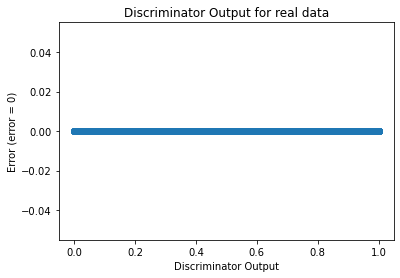

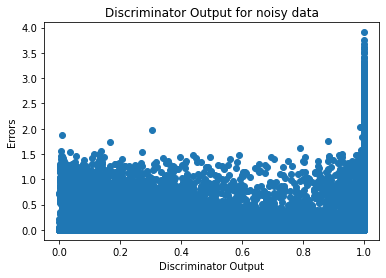

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)